In [18]:
paths_file = '/Users/vsetty/Downloads/blogcat-single-walk.walks.0'

In [19]:
def updateContextPairs(node, context_node):
    if context_node != '' and node != '':
#         print("inside empty check")
        context_pair_str = node + " " + context_node
#         print(context_pair_str)
        if context_pair_str in context_pairs:
            context_pairs[context_pair_str] = context_pairs[context_pair_str] + 1
        else:
            context_pairs[context_pair_str] = 1

In [20]:
context_pairs = {}
def convertPathsToContextPairs(paths_file):
    f = open(paths_file)
    for l in f:
        nodes = l.strip().split(' ')
    #     print(nodes)
        window = 10
        i = 0
        while i < len(nodes):
            
            node = nodes[i].strip()
#             print(node)
            if node == '':
                continue
            j = 1
            while j <= window:
    #             if i != j:
                context_node = ''
#                 print(i+j, len(nodes))
                if i+j < len(nodes):
                    context_node =  nodes[i+j].strip()
                    updateContextPairs(node, context_node)
#                     print("right node " + context_node)
                if i-j >= 0:
                    context_node =  nodes[i-j].strip()
                    updateContextPairs(node, context_node)
                j = j + 1
                
            i = i + 1

#     break
# print(context_pairs)

In [21]:
# for i in range(0,27):
#     file_name = '../data/BlogCatalog-edgelist.txt-deepwalk.embeddings.walks.' + str(i)
#     print(file_name)
#     convertPathsToContextPairs(file_name)
#     print(len(context_pairs))

In [22]:
convertPathsToContextPairs(paths_file)

In [23]:
context_pairs_file = paths_file + "context_org_deepwalk"
# context_pairs_file = '../data/blogcat-single-walk.walks.0'
femb_iterative = open(context_pairs_file, 'w')
totalcount = 0

for (key, value) in context_pairs.items():
    totalcount = totalcount + value
    femb_iterative.write(str(key) +  " " + str(value) + "\n" )
femb_iterative.close()
totalcount

7115280

[4064875   86547   22850    9253    4553    2630    1626    1366     650
     529     421     352     264     212     181     149     124      87
      67      85      61      54      38      50      34      36      44
      30      12      10      15      11       7       8      18      14
       8       7       2       4       4       8       1       6       2
       0       4       1       1       4       0       2       1       0
       0       0       1       0       0       0       2       0       0
       0       0       0       0       0       1       0       0       0
       0       1       0       1       0       0       0       0       0
       1       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       1]


/Users/vsetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  # Remove the CWD from sys.path while we load stuff.


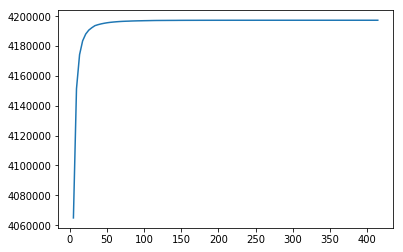

In [24]:
import numpy as np
import matplotlib.pyplot as plt


vals = np.fromiter(context_pairs.values(), dtype=int)
# Choose how many bins you want here
num_bins = 100

# Use the histogram function to bin the data
counts, bin_edges = np.histogram(vals, bins=num_bins, normed=False)
print(counts)
# Now find the cdf
cdf = np.cumsum(counts)

# And finally plot the cdf
plt.plot(bin_edges[1:], cdf)

plt.show()